# Etapa 3
___
## Lucas Chen Alba

## A quantidade de energia elétrica consumida e a renda influenciam na quantidade de CO2 emitidos por uma pessoa?

O problema escolhido consiste em analisar quanto o consumo de energia elétrica per capita e a renda per capita podem se relacionar linearmente com a emissão de CO2 per capita. Traduzindo para a estatística, analisar a inclinação das retas produzidas pela junção dos dados de CO2 com a renda e da CO2 com energia elétrica. Se a inclinação for alta, significa que a variável explicativa em questão

In [1]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
import numpy as np

import statsmodels.api as sm1 #Usa OLS com X como matriz de planejamento
import statsmodels.formula.api as sm  #Usa OLS como no R


print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\chend\Documents\GitHub\CD1S17\Projeto 5


In [12]:
co2 = pd.read_excel('co2.xlsx', index_col=0)
elec = pd.read_excel('elec.xlsx', index_col=0)
renda = pd.read_excel('renda.xlsx', index_col=0)

In [20]:
#Juntando as três tabelas no para uma planilha unificada

dados = co2.join(elec, how='outer')
dados = dados.join(renda, how='outer')
dados.head()

,co2,elec,renda
Abkhazia,NaN,NaN,NaN
Afghanistan,0.262174,NaN,1637.0
Akrotiri and Dhekelia,NaN,NaN,NaN
Albania,1.336544,1800.870627,9374.0
Algeria,3.480977,986.865004,12494.0


In [21]:
dados.shape

(275, 3)

In [22]:
#Retirar NaN de todos os países que não tem algum dos 3 dados no ano de 2011
dados = dados[~np.isnan(dados.co2)]
dados = dados[~np.isnan(dados.renda)]
dados = dados[~np.isnan(dados.elec)]
dados.head()

,co2,elec,renda
Albania,1.336544,1800.870627,9374.0
Algeria,3.480977,986.865004,12494.0
Angola,1.593918,246.660669,7047.0
Argentina,4.466338,2907.176618,15765.0
Armenia,1.364888,1676.060977,6508.0


In [23]:
dados.shape

(127, 3)

# Análise descritiva

In [30]:
dados.co2.describe()

count    127.000000
mean       5.993800
std        7.122201
min        0.046079
25%        1.377786
50%        4.087687
75%        7.679920
max       40.098333
Name: co2, dtype: float64

In [31]:
dados.renda.describe()

count       127.000000
mean      20681.078740
std       20506.477891
min         632.000000
25%        6487.000000
50%       14660.000000
75%       29885.000000
max      127984.000000
Name: renda, dtype: float64

In [32]:
dados.elec.describe()

count      127.000000
mean      4350.418077
std       6061.729664
min         24.655430
25%        913.326133
50%       2498.172034
75%       5829.382154
max      51439.908691
Name: elec, dtype: float64

### Percebe-se que o desvio padrão parece bastante alto nas três variáveis, isso se da à presença de alguns outliers na base de dados, porém eles não influenciaram no resultado final, uma vez que iremos realizar a transformação logarítmica dos dados.

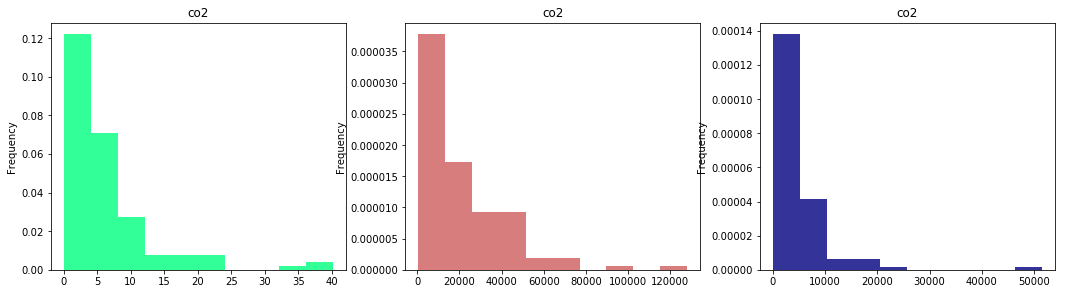

In [39]:
plt.figure(figsize=(18,10))


plt.subplot(2,3,1)
dados.co2.plot.hist(color = "SpringGreen", alpha = 0.8, title = 'co2', normed = 1)

plt.subplot(2,3,2)
dados.renda.plot.hist(color = "IndianRed", alpha = 0.8, title = 'co2', normed = 1)

plt.subplot(2,3,3)
dados.elec.plot.hist(color = "Navy", alpha = 0.8, title = 'co2', normed = 1)

### Os gráficos acima indicam que as três variáveis escolhidas parecem assumir uma distribuição exponencial. Por este motivo é utilizado o ajuste abaixo realizando a transformação dos dados para log(dados), pois a curva dos dados originais aproxima-se à uma reta, podendo assim ajustar os dados através do método de regressão.

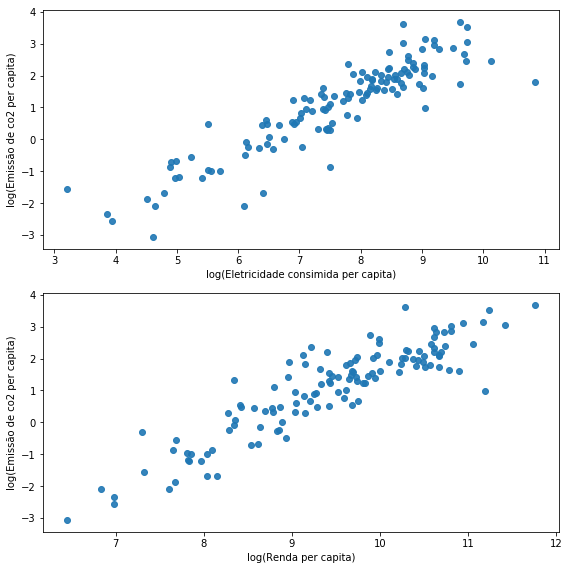

In [48]:
f, ax = plt.subplots(2,figsize=(8,8))
ax[0].scatter(np.log (dados.elec), np.log(dados.co2), alpha=0.9)  # Plot the raw data
ax[0].set_xlabel("log(Eletricidade consimida per capita)")
ax[0].set_ylabel("log(Emissão de co2 per capita)")

ax[1].scatter(np.log(dados.renda), np.log(dados.co2), alpha=0.9)  # Plot the raw data
ax[1].set_xlabel("log(Renda per capita)")
ax[1].set_ylabel("log(Emissão de co2 per capita)")


plt.tight_layout(1)

In [53]:
dados.corr(method = 'pearson')

,co2,elec,renda
co2,1.000000,0.516075,0.784001
elec,0.516075,1.000000,0.661832
renda,0.784001,0.661832,1.000000


In [54]:
dadosln = np.log(dados)
dadosln.corr(method = 'pearson')

,co2,elec,renda
co2,1.000000,0.904968,0.902327
elec,0.904968,1.000000,0.899549
renda,0.902327,0.899549,1.000000


### Percebe-se que as correlações não são tão altas quando utilizados os dados originais, principalmente consumo de energia com co2. Porém quando aplicado o log nessas variáveis a correlação torna-se muito mais alta.

# Regressão

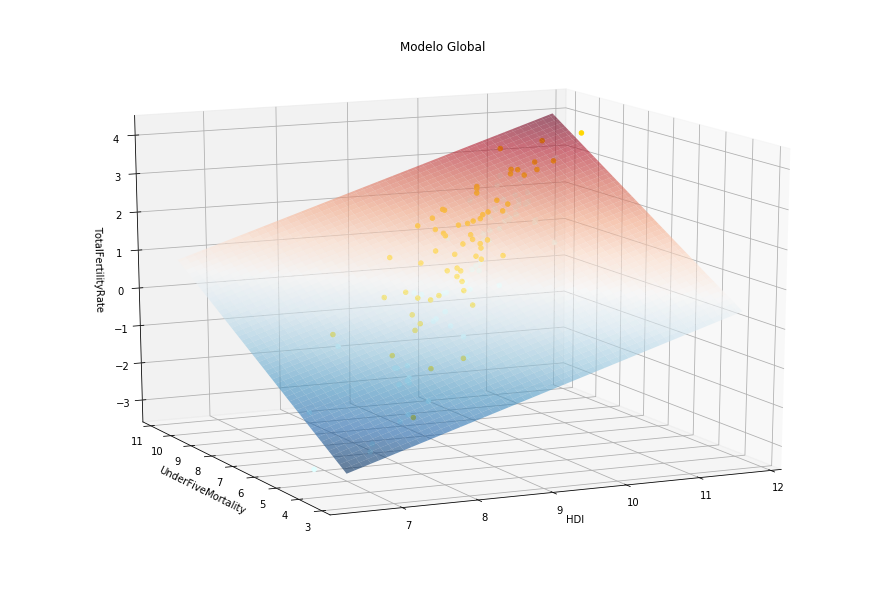

In [58]:
X = dadosln[['renda', 'elec']]
y = dadosln['co2']

X = sm1.add_constant(X)
est = sm1.OLS(y, X).fit()

xx1, xx2 = np.meshgrid(np.linspace(X.renda.min(), X.renda.max(), 100), 
                       np.linspace(X.elec.min(), X.elec.max(), 100))

Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

resid = y - est.predict(X)
ax.scatter(X[resid >= 0].renda, X[resid >= 0].elec, y[resid >= 0], c='gold', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].renda, X[resid < 0].elec, y[resid < 0], c='lightCyan', alpha=1.0)

ax.set_xlabel('HDI')
ax.set_ylabel('UnderFiveMortality')
ax.set_zlabel('TotalFertilityRate')
ax.set_title('Modelo Global')
plt.show()